## Data Matrix 
-  4 dimensions
-  integer attributes

In [1]:
# imports and matrix definition

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

D = np.array([[10,60,10,90],
              [20,50,40,70],
              [30,50,30,40],
              [20,50,20,60],
              [10,60,30,10]])

# set formatting options
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})


In [2]:
# c
dist_1_3 = np.sqrt((D[0]-D[2]).dot((D[0]-D[2]).T))
print(f'distance between x1 and x3 = {float_formatter(dist_1_3)}')


distance between x1 and x3 = 58.31


In [3]:
# d
len_2 = np.sqrt(D[1].dot(D[1].T))
print(f'length of x2 = {float_formatter(len_2)}')

length of x2 = 96.95


In [4]:
# e
cos_2_4 = (D[1].dot(D[3]))/(np.linalg.norm(D[1])*np.linalg.norm(D[3]))
print(f'cos angle between x2 and x4 = {float_formatter(cos_2_4)}')

cos angle between x2 and x4 = 0.98


-  we don't need attribute scaling since the data all features seem to lie in the range (10,90)

In [5]:
# g
col_wise_max = np.max(D, axis=0, keepdims=True)
col_wise_min = np.min(D, axis=0, keepdims=True)
D_norm = (D-col_wise_min)/(col_wise_max-col_wise_min)
print(f'normmalized D =\n {D_norm}')

normmalized D =
 [[0.00 1.00 0.00 1.00]
 [0.50 0.00 1.00 0.75]
 [1.00 0.00 0.67 0.38]
 [0.50 0.00 0.33 0.62]
 [0.00 1.00 0.67 0.00]]


In [6]:
# h

# c repeated
dist_1_3 = np.sqrt((D_norm[0]-D_norm[2]).dot((D_norm[0]-D_norm[2]).T))
print(f'distance between x1 and x3 = {float_formatter(dist_1_3)}')


# d repeated
len_2 = np.sqrt(D_norm[1].dot(D_norm[1].T))
print(f'length of x2 = {float_formatter(len_2)}')

# e repeated
cos_2_4 = (D_norm[1].dot(D_norm[3]))/(np.linalg.norm(D_norm[1])*np.linalg.norm(D_norm[3]))
print(f'cos angle between x2 and x4 = {float_formatter(cos_2_4)}')



distance between x1 and x3 = 1.68
length of x2 = 1.35
cos angle between x2 and x4 = 0.90


### part 2

In [7]:
# a
norm_row_wise = np.linalg.norm(D, axis=1, keepdims=True)
print(f'norm per instance = \n{norm_row_wise}')


norm per instance = 
[[109.09]
 [96.95]
 [76.81]
 [83.07]
 [68.56]]


cosine similarity = 
[[1.00 0.94 0.86 0.97 0.66]
 [0.94 1.00 0.95 0.98 0.77]
 [0.86 0.95 1.00 0.96 0.87]
 [0.97 0.98 0.96 1.00 0.77]
 [0.66 0.77 0.87 0.77 1.00]]


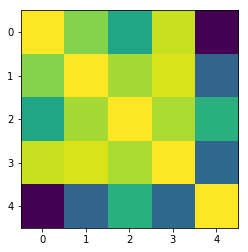

In [8]:
# b
sim_mat = cosine_similarity(D)
print(f'cosine similarity = \n{sim_mat}')
plt.imshow(sim_mat)
plt.show()

euclidean matrix = 
[[0.00 38.73 58.31 34.64 82.46]
 [38.73 0.00 33.17 22.36 62.45]
 [58.31 33.17 0.00 24.49 37.42]
 [34.64 22.36 24.49 0.00 52.92]
 [82.46 62.45 37.42 52.92 0.00]]


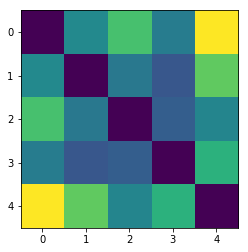

In [9]:
# c
euc_mat = euclidean_distances(D)
print(f'euclidean matrix = \n{euc_mat}')
plt.imshow(euc_mat)
plt.show()

## PCA
### part 3

In [10]:
# a
D3 = D[:,[0,1,3]]
print(f'D3 = \n {D3}')

D3 = 
 [[10 60 90]
 [20 50 70]
 [30 50 40]
 [20 50 60]
 [10 60 10]]


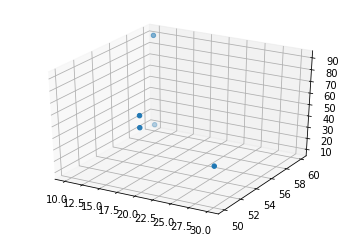

In [11]:
def plot_3d(mat):    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(mat[:,0],mat[:,1],mat[:,2])

plot_3d(D3)

In [12]:
# c
mean2 = np.mean(D3,axis=0) 
print(f'mean={mean2}')

mean=[18.00 54.00 54.00]


In [13]:
# d
Z = D3 - mean2
print(f'Z = \n{Z}')

Z = 
[[-8.00 6.00 36.00]
 [2.00 -4.00 16.00]
 [12.00 -4.00 -14.00]
 [2.00 -4.00 6.00]
 [-8.00 6.00 -44.00]]


In [14]:
# e
n = Z.shape[0]
cov = Z.T.dot(Z)/n 
print(f'cov = \n{cov}')

cov = 
[[56.00 -32.00 -12.00]
 [-32.00 24.00 -16.00]
 [-12.00 -16.00 744.00]]


In [15]:
# f
eigenvals,eigenvecs = np.linalg.eig(cov)
sort_idx = np.argsort(eigenvals)[::-1]
eigenvals = eigenvals[sort_idx]
eigenvecs = eigenvecs[:,sort_idx]
print(f'eigenvalues = {eigenvals}')
print(f'eigenvectors =\n {eigenvecs}')

eigenvalues = [744.54 75.77 3.69]
eigenvectors =
 [[-0.02 0.85 -0.53]
 [-0.02 -0.53 -0.85]
 [1.00 0.00 -0.03]]


In [16]:
# g
diag_lambda = np.diag(eigenvals)
decomp = eigenvecs.dot(diag_lambda).dot(eigenvecs.T)
print(f'result of decomposition of matrix = \n{decomp}')

result of decomposition of matrix = 
[[56.00 -32.00 -12.00]
 [-32.00 24.00 -16.00]
 [-12.00 -16.00 744.00]]


In [17]:
# h 
total_variance = np.sum(eigenvals)
fst_exp_var = eigenvals[0]/total_variance
print(f'explained variance of first eigenvector = {float_formatter(fst_exp_var)}')
# 90% is good enough

explained variance of first eigenvector = 0.90


In [18]:
# i
P = eigenvecs[:,:2]
print(f'P =\n {P}')

P =
 [[-0.02 0.85]
 [-0.02 -0.53]
 [1.00 0.00]]


In [19]:
# j
D2 = D3.dot(P)
print(f'D2 = \n{D2}')

D2 = 
[[88.51 -22.84]
 [68.57 -9.13]
 [38.42 -0.70]
 [58.58 -9.15]
 [8.54 -23.05]]


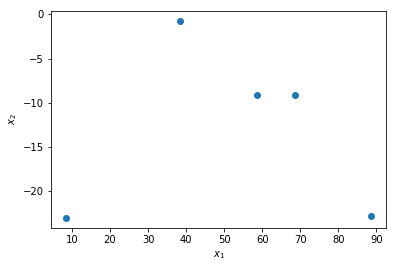

In [20]:
# k
plt.scatter(D2[:,0],D2[:,1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

### part 4

In [21]:
X = np.array([[0.5,4.5,2.5],
              [2.2,1.5,.1],
              [3.9,3.5,1.1],
              [2.1,1.9,4.9],
              [.5,3.2,1.2]])

mean = np.mean(X,axis=0)
# A
Z = X - mean
n = Z.shape[0] 
cov = (1/n)*Z.T.dot(Z)
print(f'mean = {mean}\n\n')
print(f'Z = \n{Z}\n\n')
print(f'cov = \n{cov}\n\n')

mean = [1.84 2.92 1.96]


Z = 
[[-1.34 1.58 0.54]
 [0.36 -1.42 -1.86]
 [2.06 0.58 -0.86]
 [0.26 -1.02 2.94]
 [-1.34 0.28 -0.76]]


cov = 
[[1.61 -0.41 -0.28]
 [-0.41 1.19 -0.04]
 [-0.28 -0.04 2.74]]




$$\lambda_a - 0.0505 \lambda_b = 0$$
$$\lambda_b - 0.647 \lambda_c = 0$$
$sum of eigenvalues = sum of main diagonal of matrix = 5.424$
$$\lambda_a + \lambda_b + \lambda_c = 5.5424 $$
$$
\begin{bmatrix}
    1       & 1 & 1 &  \\
    1       & -0.505 & 0 \\
    0       & 1 & -0.647
\end{bmatrix}
\begin{bmatrix}
   \lambda_a \\
    \lambda_b \\
    \lambda_c
\end{bmatrix}
=
\begin{bmatrix}
   5.5424 \\
    0 \\
    0
\end{bmatrix}
$$
$$\lambda_a = 0.91749706$$
$$\lambda_b = 1.81682587$$
$$\lambda_c = 2.80807707$$

In [22]:
# solving the above matrix equation for lambdas
A = np.array([[1,1,1],[1,-.505,0],[0,1,-.647]])
C = np.array([5.5424,0,0])
eigenvals = np.linalg.inv(A).dot(C)
exp_var = (eigenvals[1]+eigenvals[2])/np.sum(eigenvals)
print(f'explained variance using lambda a and b = {float_formatter(exp_var)}')


explained variance using lambda a and b = 0.83
